In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

### Importe o dataset 

In [2]:
mnist = datasets.load_digits()

### Divida o conjunto de dados em treino e teste. Para isso utilize o módulo train_test_split do scikit learn 


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
mnist.target, test_size=0.25, random_state=42)

In [5]:
# trainData = 75%
# testData = 25%
# trainLabel = 75%
# testLabel = 25%

In [6]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

In [7]:
# 25% teste

# Dos dados de treino
# 10% validação
# 90% treino

In [8]:
print("training data points: {}".format(len(trainLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1212
testing data points: 450


### Inicialize os valores de k para o classificador KNN juntamente com uma lista para armazenar os valores da acurácia

In [9]:
kVals = range(1, 30, 2)
accuracies = []

### Utilize o KNeighborsClassifier do scikit learn para criar o seu classificador
https://scikit-learn.org/stable/modules/neighbors.html

In [10]:
# for k in range(1, 50, 2):
for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        ## Define as métricas de treino
        
        model.fit(trainData, trainLabels)
        ## Ajusta o modelo para os dados passados como parametro, treina o modelo
        
        ## model.predict(x') após treinar o modelo, ele prediz e retorna um y', ou seja, uma classe para a entrada
        y = model.predict(testData)
        
        # evaluate the model and update the accuracies list
        score = model.score(valData, valLabels)
        ## Faz a acurácia e diz o quanto o modelo acertou com os dados de teste
        
        
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%


### Imprima em um gráfico os valores da acurácia em função de k

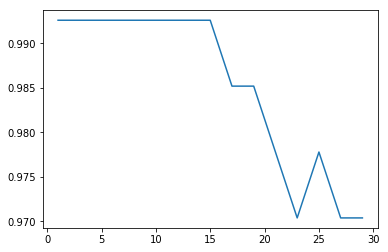

In [11]:
%matplotlib inline

plt.plot(kVals, accuracies)

### Avaliação : Escolha o k com a melhor acurácia e avalie  o modelo utilizabdo as métricas de classificação disponíveis no keras

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

* confusion_matrix
* accuracy_score
* f1_score
* etc

In [12]:
# CONFUSION_MATRIX

# confusion_matrix(y_true, y_pred)

from sklearn.metrics import confusion_matrix

modelk = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
modelk = model.fit(trainData, trainLabels)

modely =  modelk.predict(trainData)

confusion_matrix(trainLabels, modely)

array([[123,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 132,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1, 123,   0,   0,   0,   0,   1,   3,   0],
       [  0,   0,   0, 116,   0,   1,   0,   3,   2,   1],
       [  0,   2,   0,   0, 103,   0,   0,   2,   2,   0],
       [  0,   0,   0,   0,   1, 105,   0,   0,   0,   4],
       [  0,   0,   0,   0,   0,   0, 118,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 124,   0,   0],
       [  0,   8,   2,   2,   0,   2,   1,   0, 110,   0],
       [  0,   1,   0,   2,   0,   1,   0,   4,   1, 108]])

In [13]:
# ACCURACY_SCORE

from sklearn.metrics import accuracy_score

accuracy_score(trainLabels, modely)

0.9587458745874587

In [14]:
accuracy_score(trainLabels, modely, normalize=False)

1162

In [15]:
# F1_SCORE

from sklearn.metrics import f1_score
f1_score(trainLabels, modely, average='macro')

0.9586821330094175

In [16]:
f1_score(trainLabels, modely, average='micro')

0.9587458745874587

In [17]:
f1_score(trainLabels, modely, average='weighted')

0.9585904614325778

In [18]:
f1_score(trainLabels, modely, average=None)

array([0.99193548, 0.95652174, 0.96850394, 0.95473251, 0.96261682,
       0.95890411, 0.99159664, 0.96124031, 0.90163934, 0.93913043])

### Modifique o parâmetro metric do classficiador e avalie outras distâncias métricas disponíveis

In [20]:
# USANDO COMO MÉTRICA O MINKOWSKI


for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
        
        model.fit(trainData, trainLabels)
        
        y = model.predict(testData)
        
        # evaluate the model and update the accuracies list
        score = model.score(valData, valLabels)        
        
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%


In [23]:
# USANDO COMO MÉTRICA O MINKOWSKI


for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        
        model.fit(trainData, trainLabels)
        
        y = model.predict(testData)
        
        # evaluate the model and update the accuracies list
        score = model.score(valData, valLabels)        
        
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=98.52%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=99.26%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.78%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%


In [25]:
# USANDO COMO MÉTRICA O MINKOWSKI


for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
        
        model.fit(trainData, trainLabels)
        
        y = model.predict(testData)
        
        # evaluate the model and update the accuracies list
        score = model.score(valData, valLabels)        
        
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=98.52%
k=3, accuracy=98.52%
k=5, accuracy=97.04%
k=7, accuracy=95.56%
k=9, accuracy=96.30%
k=11, accuracy=97.04%
k=13, accuracy=97.04%
k=15, accuracy=97.78%
k=17, accuracy=98.52%
k=19, accuracy=97.78%
k=21, accuracy=97.78%
k=23, accuracy=97.78%
k=25, accuracy=97.78%
k=27, accuracy=97.78%
k=29, accuracy=97.04%


    Como foi possível perceber, das métricas analisadas, todas obtiveram um valor próximo com relação a sua acurácia. O que obteve um melhor destaque foi a métrica de minkowski, mas não muito distante dos demais.